In [ ]:
#!pip install beautifulsoup4

In [102]:
## Importing Libraries
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import string
import spacy
import re
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 
import seaborn as sns

#### Extracting reviews from Amazon for Oneplus Phone

In [9]:
link = 'https://www.amazon.in/Test-Exclusive-545/product-reviews/B077Q42GDF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [10]:
page = requests.get(link)

In [11]:
page

<Response [200]>

In [12]:
soup = bs(page.content, 'html.parser')

In [15]:
text = soup.find_all('span', {'data-hook': 'review-body'})

In [16]:
text

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   Good:<br/>Performance<br/>Looks<br/>Main Camera<br/><br/>Average :<br/>Ultra wide, Telephoto and selfie camera<br/>Battery life<br/><br/>Bad:<br/>Heats quite a bit<br/>Weight balance<br/><br/>Ugly :<br/>Display. Black bar, green tint, non-uniform colors at lower brightness, black crush even after update.
 </span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   Received my OnePlus 8 pro (12GB+256GB) today and it is an absolute beast  thanks to Amazon for fast delivery and also 3k discount using SBI credit card.<br/><br/>Pros<br/>Snapdragon 865 best chipset available for Android<br/>Stunning 120hz display<br/>Excellent battery life<br/>30watt warp charge<br/>Wireless charging<br/>IP68 rating<br/>Improved camera quality<br/>5g support<br/>UFS 3.0 storage<br/>Best in class Android skin (Oxygen OS)<br/>No display issues in Indian units<br/>C

In [17]:
len(text)

10

In [18]:
rev_text = []
for i in range(0, len(text)):
    rev_text.append(text[i].get_text())

rev_text

['\n\n  Good:PerformanceLooksMain CameraAverage :Ultra wide, Telephoto and selfie cameraBattery lifeBad:Heats quite a bitWeight balanceUgly :Display. Black bar, green tint, non-uniform colors at lower brightness, black crush even after update.\n\n',
 '\n\n  Received my OnePlus 8 pro (12GB+256GB) today and it is an absolute beast  thanks to Amazon for fast delivery and also 3k discount using SBI credit card.ProsSnapdragon 865 best chipset available for AndroidStunning 120hz displayExcellent battery life30watt warp chargeWireless chargingIP68 ratingImproved camera quality5g supportUFS 3.0 storageBest in class Android skin (Oxygen OS)No display issues in Indian unitsConsphotochrom filter disabled ( I really wanted to try that one )Curved edges cause accidental touches ( I hope they will fix it in new update)Overall a true flagship from OnePlus\n\n',
 "\n\n  Don't buy this phone!oneplus company released fake updates for color filter camera in which camera is useless and not taking images l

In [19]:
rev_text[:] = [text.lstrip('\n') for text in rev_text]
rev_text

['  Good:PerformanceLooksMain CameraAverage :Ultra wide, Telephoto and selfie cameraBattery lifeBad:Heats quite a bitWeight balanceUgly :Display. Black bar, green tint, non-uniform colors at lower brightness, black crush even after update.\n\n',
 '  Received my OnePlus 8 pro (12GB+256GB) today and it is an absolute beast  thanks to Amazon for fast delivery and also 3k discount using SBI credit card.ProsSnapdragon 865 best chipset available for AndroidStunning 120hz displayExcellent battery life30watt warp chargeWireless chargingIP68 ratingImproved camera quality5g supportUFS 3.0 storageBest in class Android skin (Oxygen OS)No display issues in Indian unitsConsphotochrom filter disabled ( I really wanted to try that one )Curved edges cause accidental touches ( I hope they will fix it in new update)Overall a true flagship from OnePlus\n\n',
 "  Don't buy this phone!oneplus company released fake updates for color filter camera in which camera is useless and not taking images like before.I

In [20]:
rev_text[:] = [text.rstrip('\n') for text in rev_text]
rev_text

['  Good:PerformanceLooksMain CameraAverage :Ultra wide, Telephoto and selfie cameraBattery lifeBad:Heats quite a bitWeight balanceUgly :Display. Black bar, green tint, non-uniform colors at lower brightness, black crush even after update.',
 '  Received my OnePlus 8 pro (12GB+256GB) today and it is an absolute beast  thanks to Amazon for fast delivery and also 3k discount using SBI credit card.ProsSnapdragon 865 best chipset available for AndroidStunning 120hz displayExcellent battery life30watt warp chargeWireless chargingIP68 ratingImproved camera quality5g supportUFS 3.0 storageBest in class Android skin (Oxygen OS)No display issues in Indian unitsConsphotochrom filter disabled ( I really wanted to try that one )Curved edges cause accidental touches ( I hope they will fix it in new update)Overall a true flagship from OnePlus',
 "  Don't buy this phone!oneplus company released fake updates for color filter camera in which camera is useless and not taking images like before.Its total

In [21]:
df = pd.DataFrame(rev_text)
df.columns = ['Reviews']
df.head()

,Reviews
0,Good:PerformanceLooksMain CameraAverage :Ult...
1,Received my OnePlus 8 pro (12GB+256GB) today...
2,Don't buy this phone!oneplus company release...
3,Recieved a defective display
4,The phone was good but the display was so BA...


In [22]:
link1 = 'https://www.amazon.in/Test-Exclusive-545/product-reviews/B077Q42GDF/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2'

In [23]:
page1 = requests.get(link1)

In [24]:
page1

<Response [200]>

In [25]:
soup1 = bs(page1.content, 'html.parser')

In [26]:
text2 = soup1.find_all('span', {"data-hook" : "review-body"})
text2

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   Everyone knows it's an amazing phone, I'll just write the cons here<br/><br/>1. A lil heavy, can't hold with one hand for much longer(Ex OnePlus 5T user)<br/><br/>2. With 120hz refersh rate and 2k resolution config, battery drains a lot.<br/><br/>And that's it, I still gave it 5 stars as it the cons are easily smashed by the pros of this phone
 </span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   This mobile doesn't come with duel 5g mode.<br/>Even after spending 57k not providing duel 5g it sucks. Even 40k mobile is providing duel 5g support, and there is no refund policy option is available ( You cannot return the mobile if you don't like it. ), before you purchase make sure you should fix your mind,<br/>others than 5g this mobile is really awesome.<br/><br/>1.Continuing after the first sale of purchase, Phone is getting over heati

In [27]:
rev_text2 = []
for i in range(0, len(text2)):
    rev_text2.append(text2[i].get_text())

rev_text2

["\n\n  Everyone knows it's an amazing phone, I'll just write the cons here1. A lil heavy, can't hold with one hand for much longer(Ex OnePlus 5T user)2. With 120hz refersh rate and 2k resolution config, battery drains a lot.And that's it, I still gave it 5 stars as it the cons are easily smashed by the pros of this phone\n\n",
 "\n\n  This mobile doesn't come with duel 5g mode.Even after spending 57k not providing duel 5g it sucks. Even 40k mobile is providing duel 5g support, and there is no refund policy option is available ( You cannot return the mobile if you don't like it. ), before you purchase make sure you should fix your mind,others than 5g this mobile is really awesome.1.Continuing after the first sale of purchase, Phone is getting over heating.2.  Battery is draining is tooo fast. ( Per day I'm keeping 3 times charging after the new update ).3.Even after having 12 GB of RAM mobile got stuck for couple of times.\n\n",
 "\n\n  There are many issues with the phone.1) 120hz doe

In [30]:
rev_text2[:] = [text.lstrip('\n') for text in rev_text2]
rev_text2

["  Everyone knows it's an amazing phone, I'll just write the cons here1. A lil heavy, can't hold with one hand for much longer(Ex OnePlus 5T user)2. With 120hz refersh rate and 2k resolution config, battery drains a lot.And that's it, I still gave it 5 stars as it the cons are easily smashed by the pros of this phone\n\n",
 "  This mobile doesn't come with duel 5g mode.Even after spending 57k not providing duel 5g it sucks. Even 40k mobile is providing duel 5g support, and there is no refund policy option is available ( You cannot return the mobile if you don't like it. ), before you purchase make sure you should fix your mind,others than 5g this mobile is really awesome.1.Continuing after the first sale of purchase, Phone is getting over heating.2.  Battery is draining is tooo fast. ( Per day I'm keeping 3 times charging after the new update ).3.Even after having 12 GB of RAM mobile got stuck for couple of times.\n\n",
 "  There are many issues with the phone.1) 120hz does not functi

In [31]:
rev_text2[:] = [text.rstrip('\n') for text in rev_text2]
rev_text2

["  Everyone knows it's an amazing phone, I'll just write the cons here1. A lil heavy, can't hold with one hand for much longer(Ex OnePlus 5T user)2. With 120hz refersh rate and 2k resolution config, battery drains a lot.And that's it, I still gave it 5 stars as it the cons are easily smashed by the pros of this phone",
 "  This mobile doesn't come with duel 5g mode.Even after spending 57k not providing duel 5g it sucks. Even 40k mobile is providing duel 5g support, and there is no refund policy option is available ( You cannot return the mobile if you don't like it. ), before you purchase make sure you should fix your mind,others than 5g this mobile is really awesome.1.Continuing after the first sale of purchase, Phone is getting over heating.2.  Battery is draining is tooo fast. ( Per day I'm keeping 3 times charging after the new update ).3.Even after having 12 GB of RAM mobile got stuck for couple of times.",
 "  There are many issues with the phone.1) 120hz does not function all t

In [32]:
df2 = pd.DataFrame(rev_text2)
df2.columns = ['Reviews']



In [33]:
df2.head()

,Reviews
0,"Everyone knows it's an amazing phone, I'll j..."
1,This mobile doesn't come with duel 5g mode.E...
2,There are many issues with the phone.1) 120h...
3,After waiting for almost one month I got my ...
4,THE BIG BOY TOYZ (Ultramarine Blue)This phon...


In [34]:
data = df.append(df2, ignore_index = True)

In [108]:
data.head()

AttributeError: 'list' object has no attribute 'head'

In [44]:
### Cleaning Text
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub('Your browser does not support HTML5 video', '', text)
   
    return text

In [45]:
data['Reviews'] = data['Reviews'].apply(clean_text)

In [46]:
data.head()

,Reviews
0,GoodPerformanceLooksMain CameraAverage Ultra...
1,Received my OnePlus 8 pro (12GB+256GB) today...
2,Don't buy this phone!oneplus company release...
3,Recieved a defective display
4,The phone was good but the display was so BA...


In [49]:
data = [Reviews.strip() for Reviews in data.Reviews]
data

['GoodPerformanceLooksMain CameraAverage Ultra wide, Telephoto and selfie cameraBattery lifeBadHeats quite a bitWeight balanceUgly Display. Black bar, green tint, non-uniform colors at lower brightness, black crush even after update.',
 'Received my OnePlus 8 pro (12GB+256GB) today and it is an absolute beast  thanks to Amazon for fast delivery and also 3k discount using SBI credit card.ProsSnapdragon 865 best chipset available for AndroidStunning 120hz displayExcellent battery life30watt warp chargeWireless chargingIP68 ratingImproved camera quality5g supportUFS 3.0 storageBest in class Android skin (Oxygen OS)No display issues in Indian unitsConsphotochrom filter disabled ( I really wanted to try that one )Curved edges cause accidental touches ( I hope they will fix it in new update)Overall a true flagship from OnePlus',
 "Don't buy this phone!oneplus company released fake updates for color filter camera in which camera is useless and not taking images like before.Its totally useless

In [73]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape 

(2477, 2)

In [74]:
from nltk import tokenize
reviews = tokenize.sent_tokenize(" ".join(data))
reviews[5:15] 

["It wasn't expected from one plus,I am facing the same issue which is experienced by most users on one plus 8 pro ,something which is called black bar issue near front facing camera when brightness of the phone is set to low,really not expected one plus.",
 'There is an uneven brightness issue where the green tint is easily visible, uneven colour calibration is present.Had invested in a wrong premium phone.',
 'Seeking some solution from oneplus or amazon after buying it on 17th June.',
 'Very sad to oneplus for the first time.',
 "I've been using OnePlus 3 more than 4 years and it was time for an upgrade for obvious reasons.",
 'It was no brainer for me to go for a OnePlus device again as OP3 is still running fine and strong (although it does not handle the newer games like CODM fine anymore).',
 "Believe me guys, Oxygen OS is by far the best skin for Android.Now, coming to OP8 pro, I've used it for a day and I can say that it didn't disappoint me.",
 "Following are some of my observ

In [80]:
review_df = pd.DataFrame(reviews, columns=['Reviews'])
review_df

,Reviews
0,GoodPerformanceLooksMain CameraAverage Ultra w...
1,"Black bar, green tint, non-uniform colors at l..."
2,Received my OnePlus 8 pro (12GB+256GB) today a...
3,Recieved a defective display The phone was goo...
4,Thanks OnePlus for the amazing experience.
...,...
83,Also thanks to the punch hole some application...
84,If Only they use the data from the 4th sensor ...
85,It comes with a host of new features ( See the...
86,Fixed some of the issues like Netflix not uti...


#### Emotion Mining

In [91]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [92]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [96]:
review_df['Score'] = review_df['Reviews'].apply(calculate_sentiment) 
review_df

,Reviews,sentiment_value,Score
0,GoodPerformanceLooksMain CameraAverage Ultra w...,0,0
1,"Black bar, green tint, non-uniform colors at l...",0,0
2,Received my OnePlus 8 pro (12GB+256GB) today a...,1,1
3,Recieved a defective display The phone was goo...,2,2
4,Thanks OnePlus for the amazing experience.,6,6
...,...,...,...
83,Also thanks to the punch hole some application...,2,2
84,If Only they use the data from the 4th sensor ...,12,12
85,It comes with a host of new features ( See the...,0,0
86,Fixed some of the issues like Netflix not uti...,2,2


In [97]:
pos_review = review_df[review_df['Score']>0]
pos_review

,Reviews,sentiment_value,Score
2,Received my OnePlus 8 pro (12GB+256GB) today a...,1,1
3,Recieved a defective display The phone was goo...,2,2
4,Thanks OnePlus for the amazing experience.,6,6
5,"It wasn't expected from one plus,I am facing t...",1,1
7,Seeking some solution from oneplus or amazon a...,1,1
10,It was no brainer for me to go for a OnePlus d...,7,7
11,"Believe me guys, Oxygen OS is by far the best ...",1,1
12,Following are some of my observations.- Displa...,7,7
13,Very difficult to use with one hand.- Fingerpr...,8,8
14,OP3 earpiece volume had deteriorated very much...,4,4


In [99]:
neg_review = review_df[review_df['Score']<0]
neg_review

,Reviews,sentiment_value,Score
6,There is an uneven brightness issue where the ...,-1,-1
8,Very sad to oneplus for the first time.,-2,-2
17,"Also, the camera bump is quite prominent.- I d...",-1,-1
25,Even little dust or wet fingertips will reject...,-4,-4
26,It's just for show now.6) Durability Curved d...,-2,-2
34,"Yes war charging is faster, but the charge whi...",-1,-1
37,Btw I have removed 120hz refresh rate on the f...,-1,-1
47,Fingerprint lockscreen works mostly 70% of the...,-2,-2
50,With 120hz refersh rate and 2k resolution conf...,-3,-3
55,There are many issues with the phone.1) 120hz ...,-7,-7


In [100]:
review_df['index'] = range(0,len(review_df))

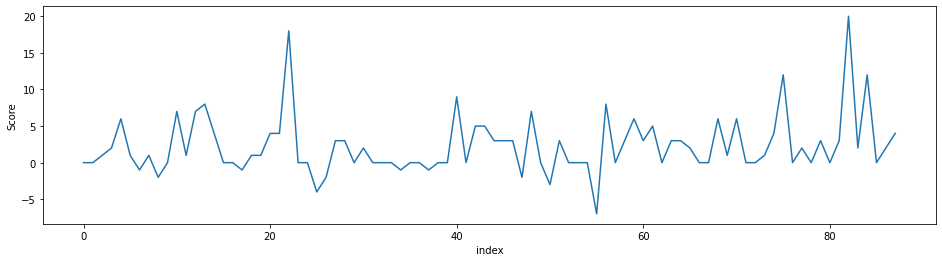

In [103]:
plt.figure(figsize=(16, 4))
sns.lineplot(y= 'Score', x='index', data= review_df)

In [106]:
rev_text = ' '.join(data)

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

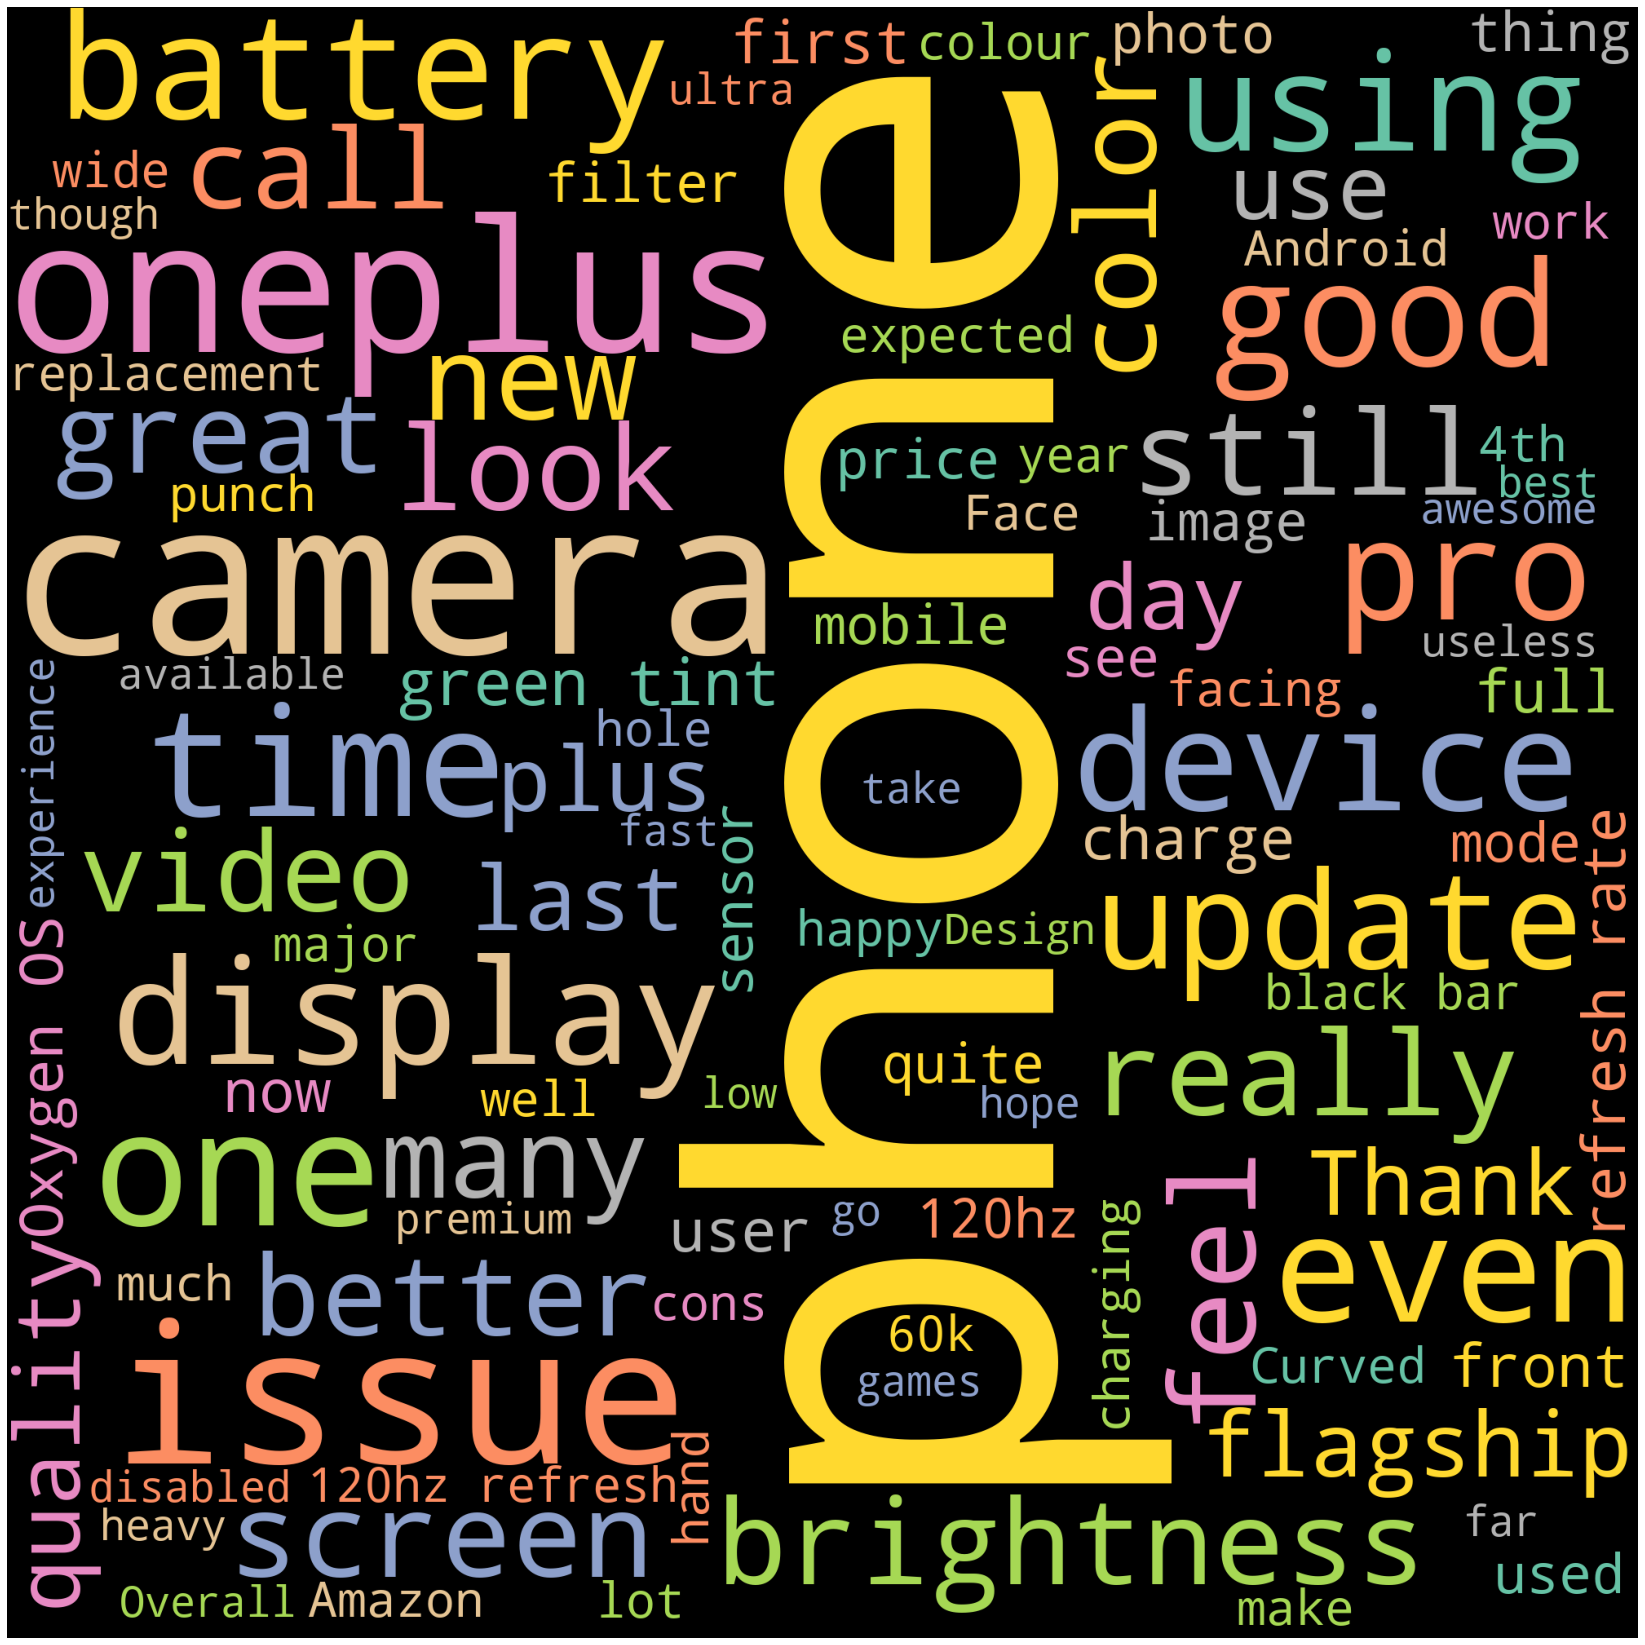

In [109]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 2000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(rev_text)

plot_cloud(wordcloud)